In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')

In [15]:
train.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [16]:
train.info

<bound method DataFrame.info of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

In [17]:
train.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [18]:
!pip install autoviz
!pip install xlrd

In [19]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


AV = AutoViz_Class()

Shape of your Data Set loaded: (26707, 34)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  14
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    34 Predictors classified...
        1 variables removed since they were ID or low-information variables
10 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 55


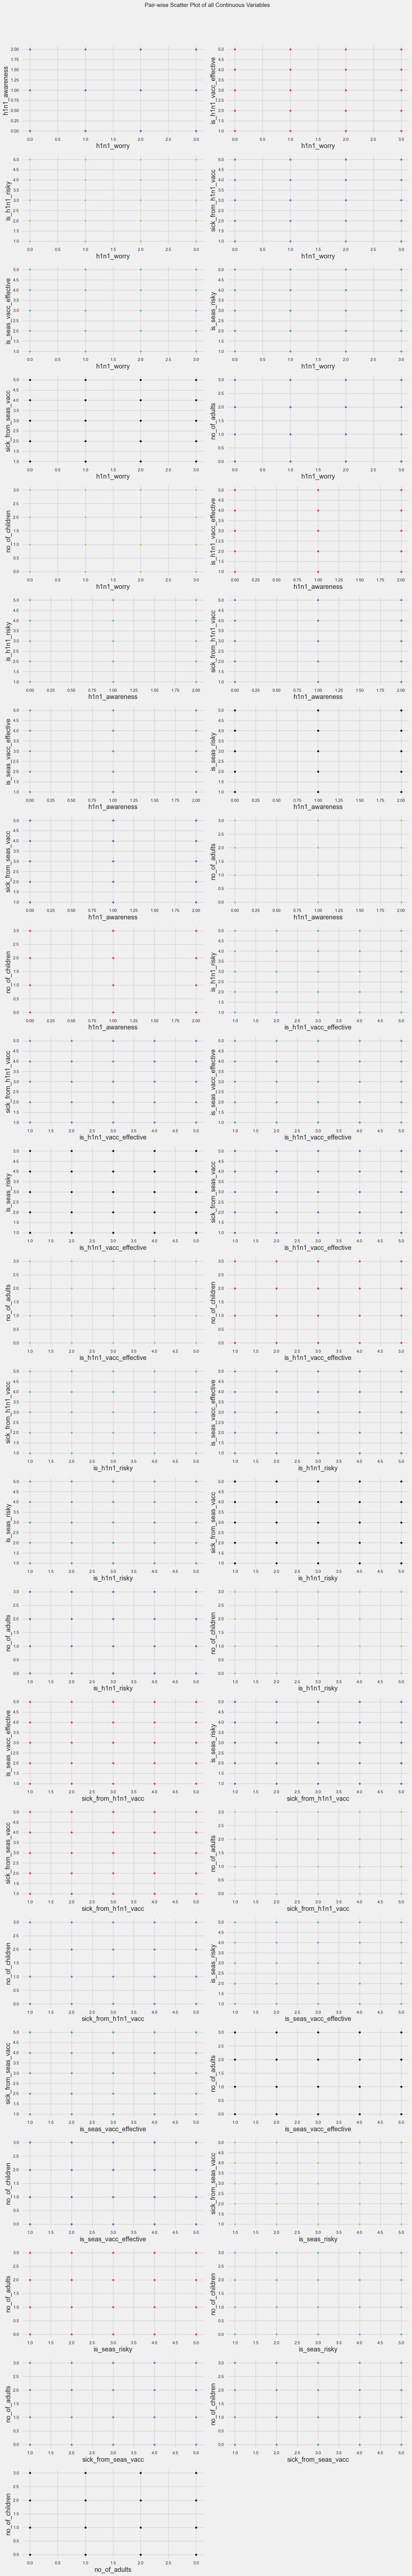

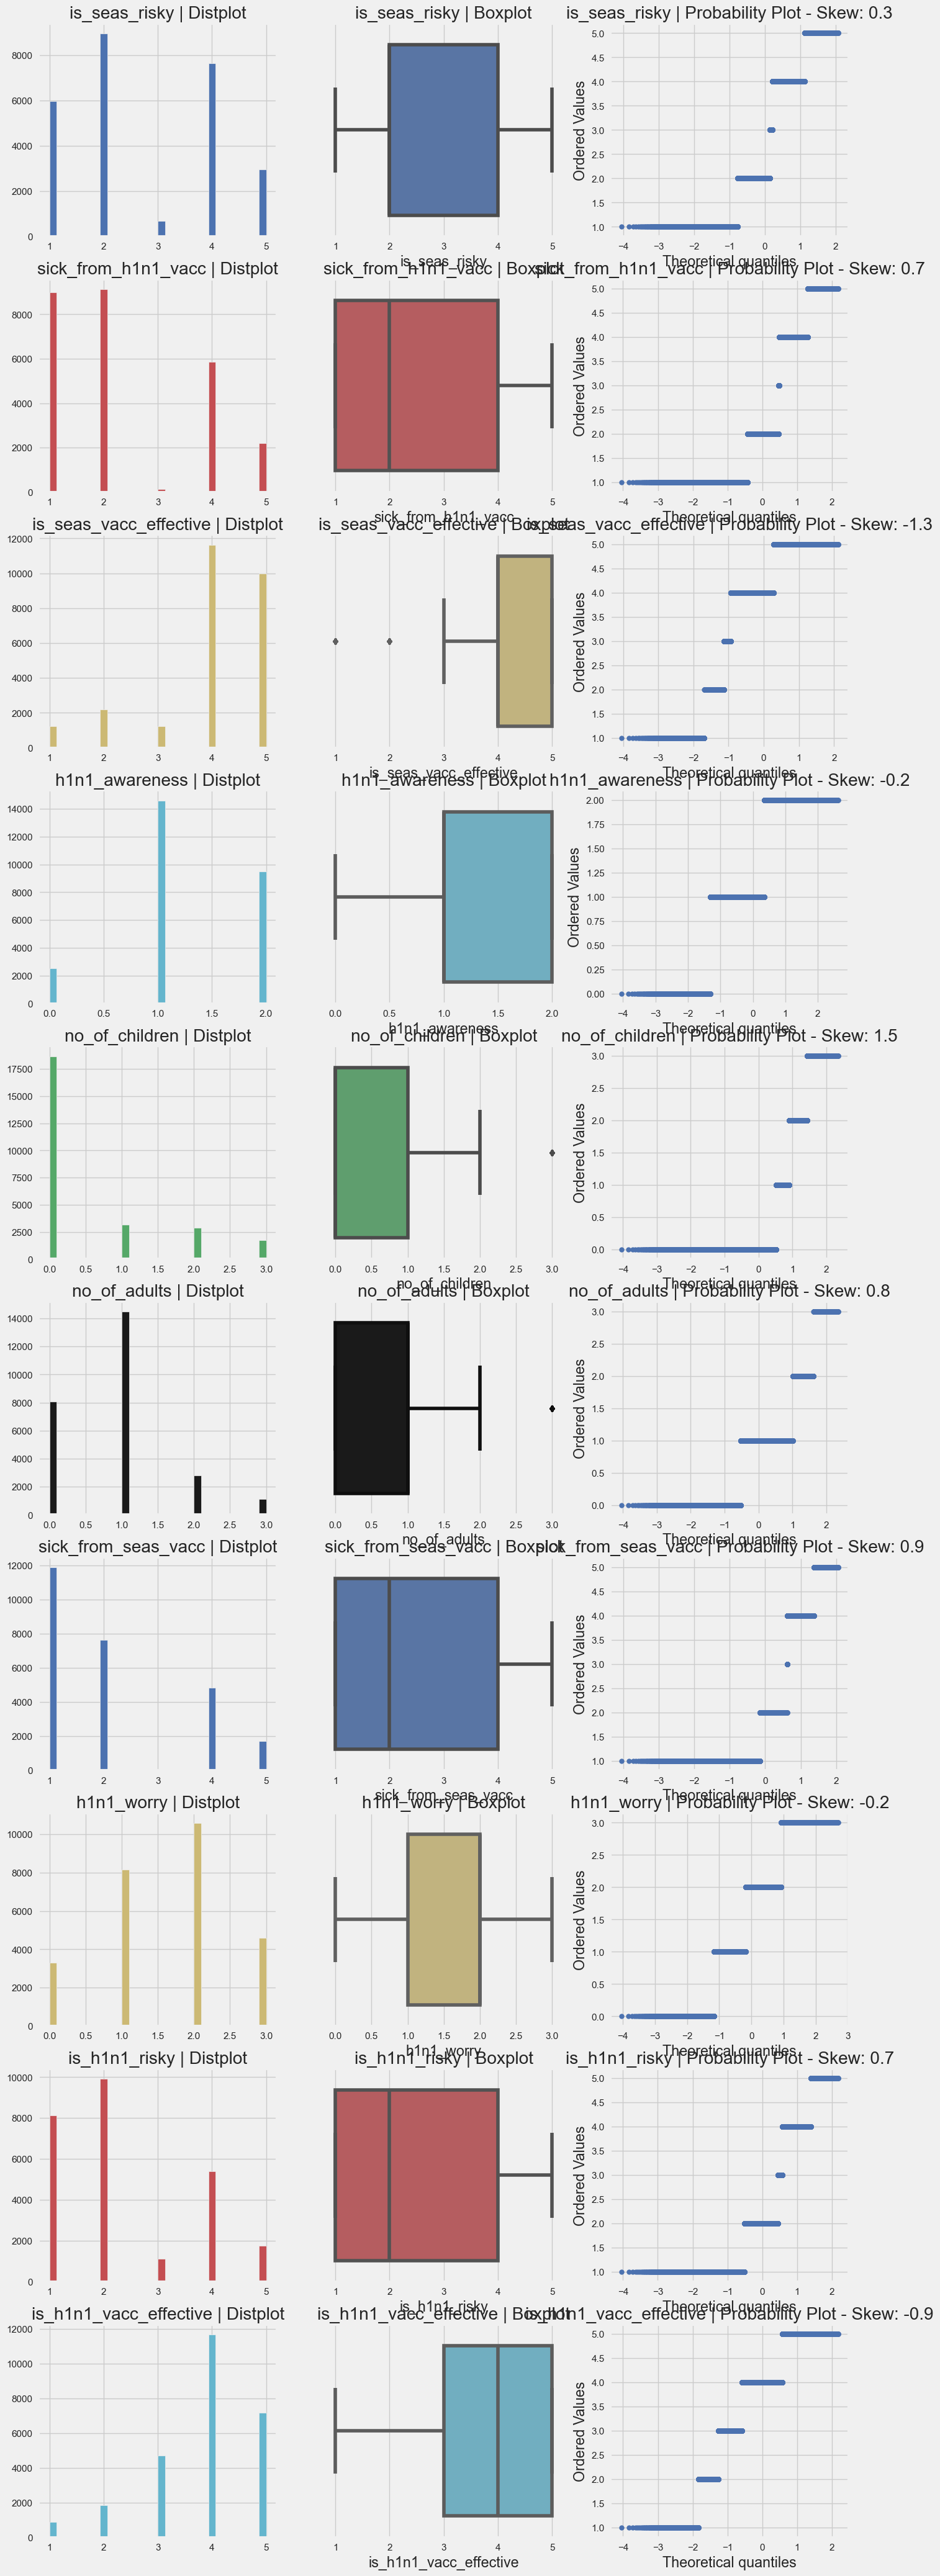

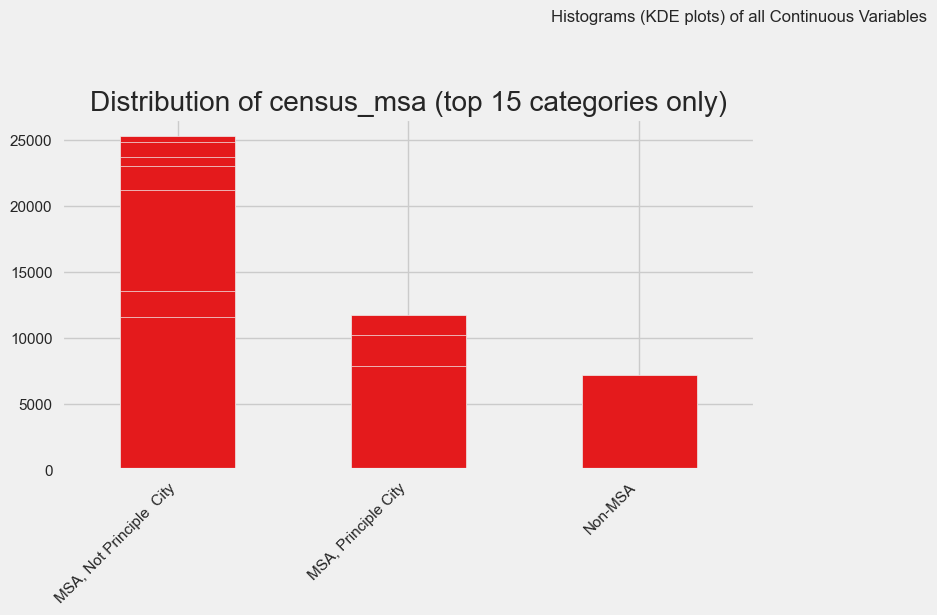

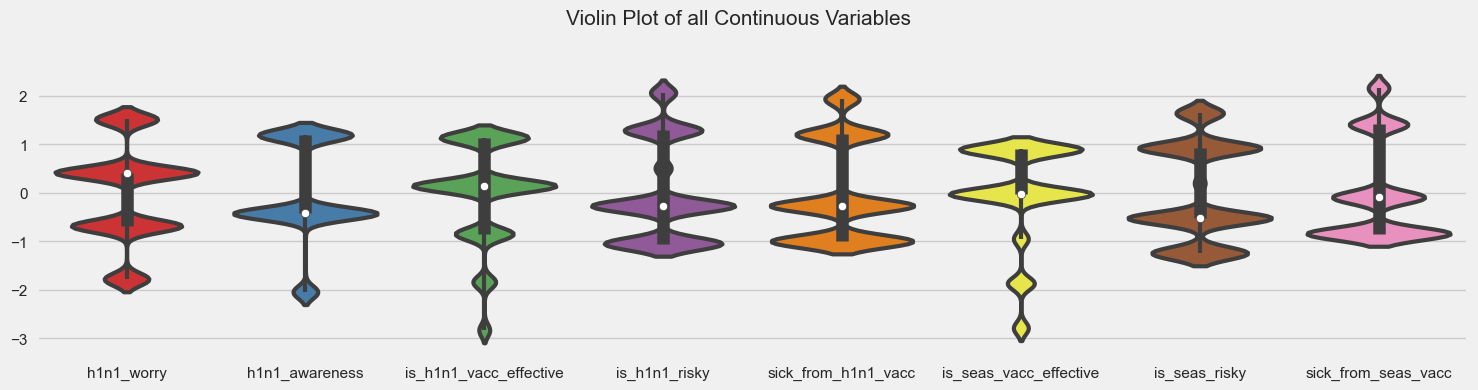

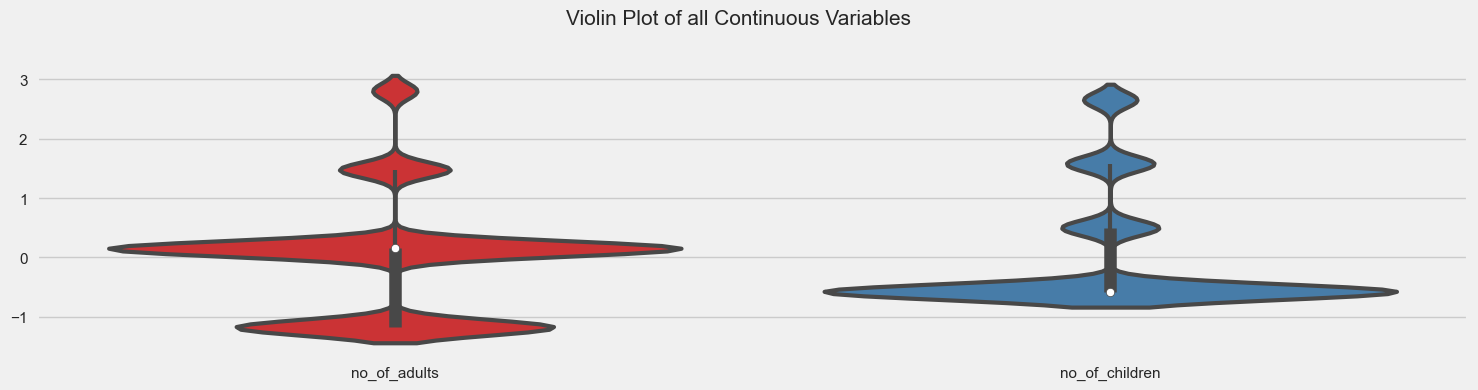

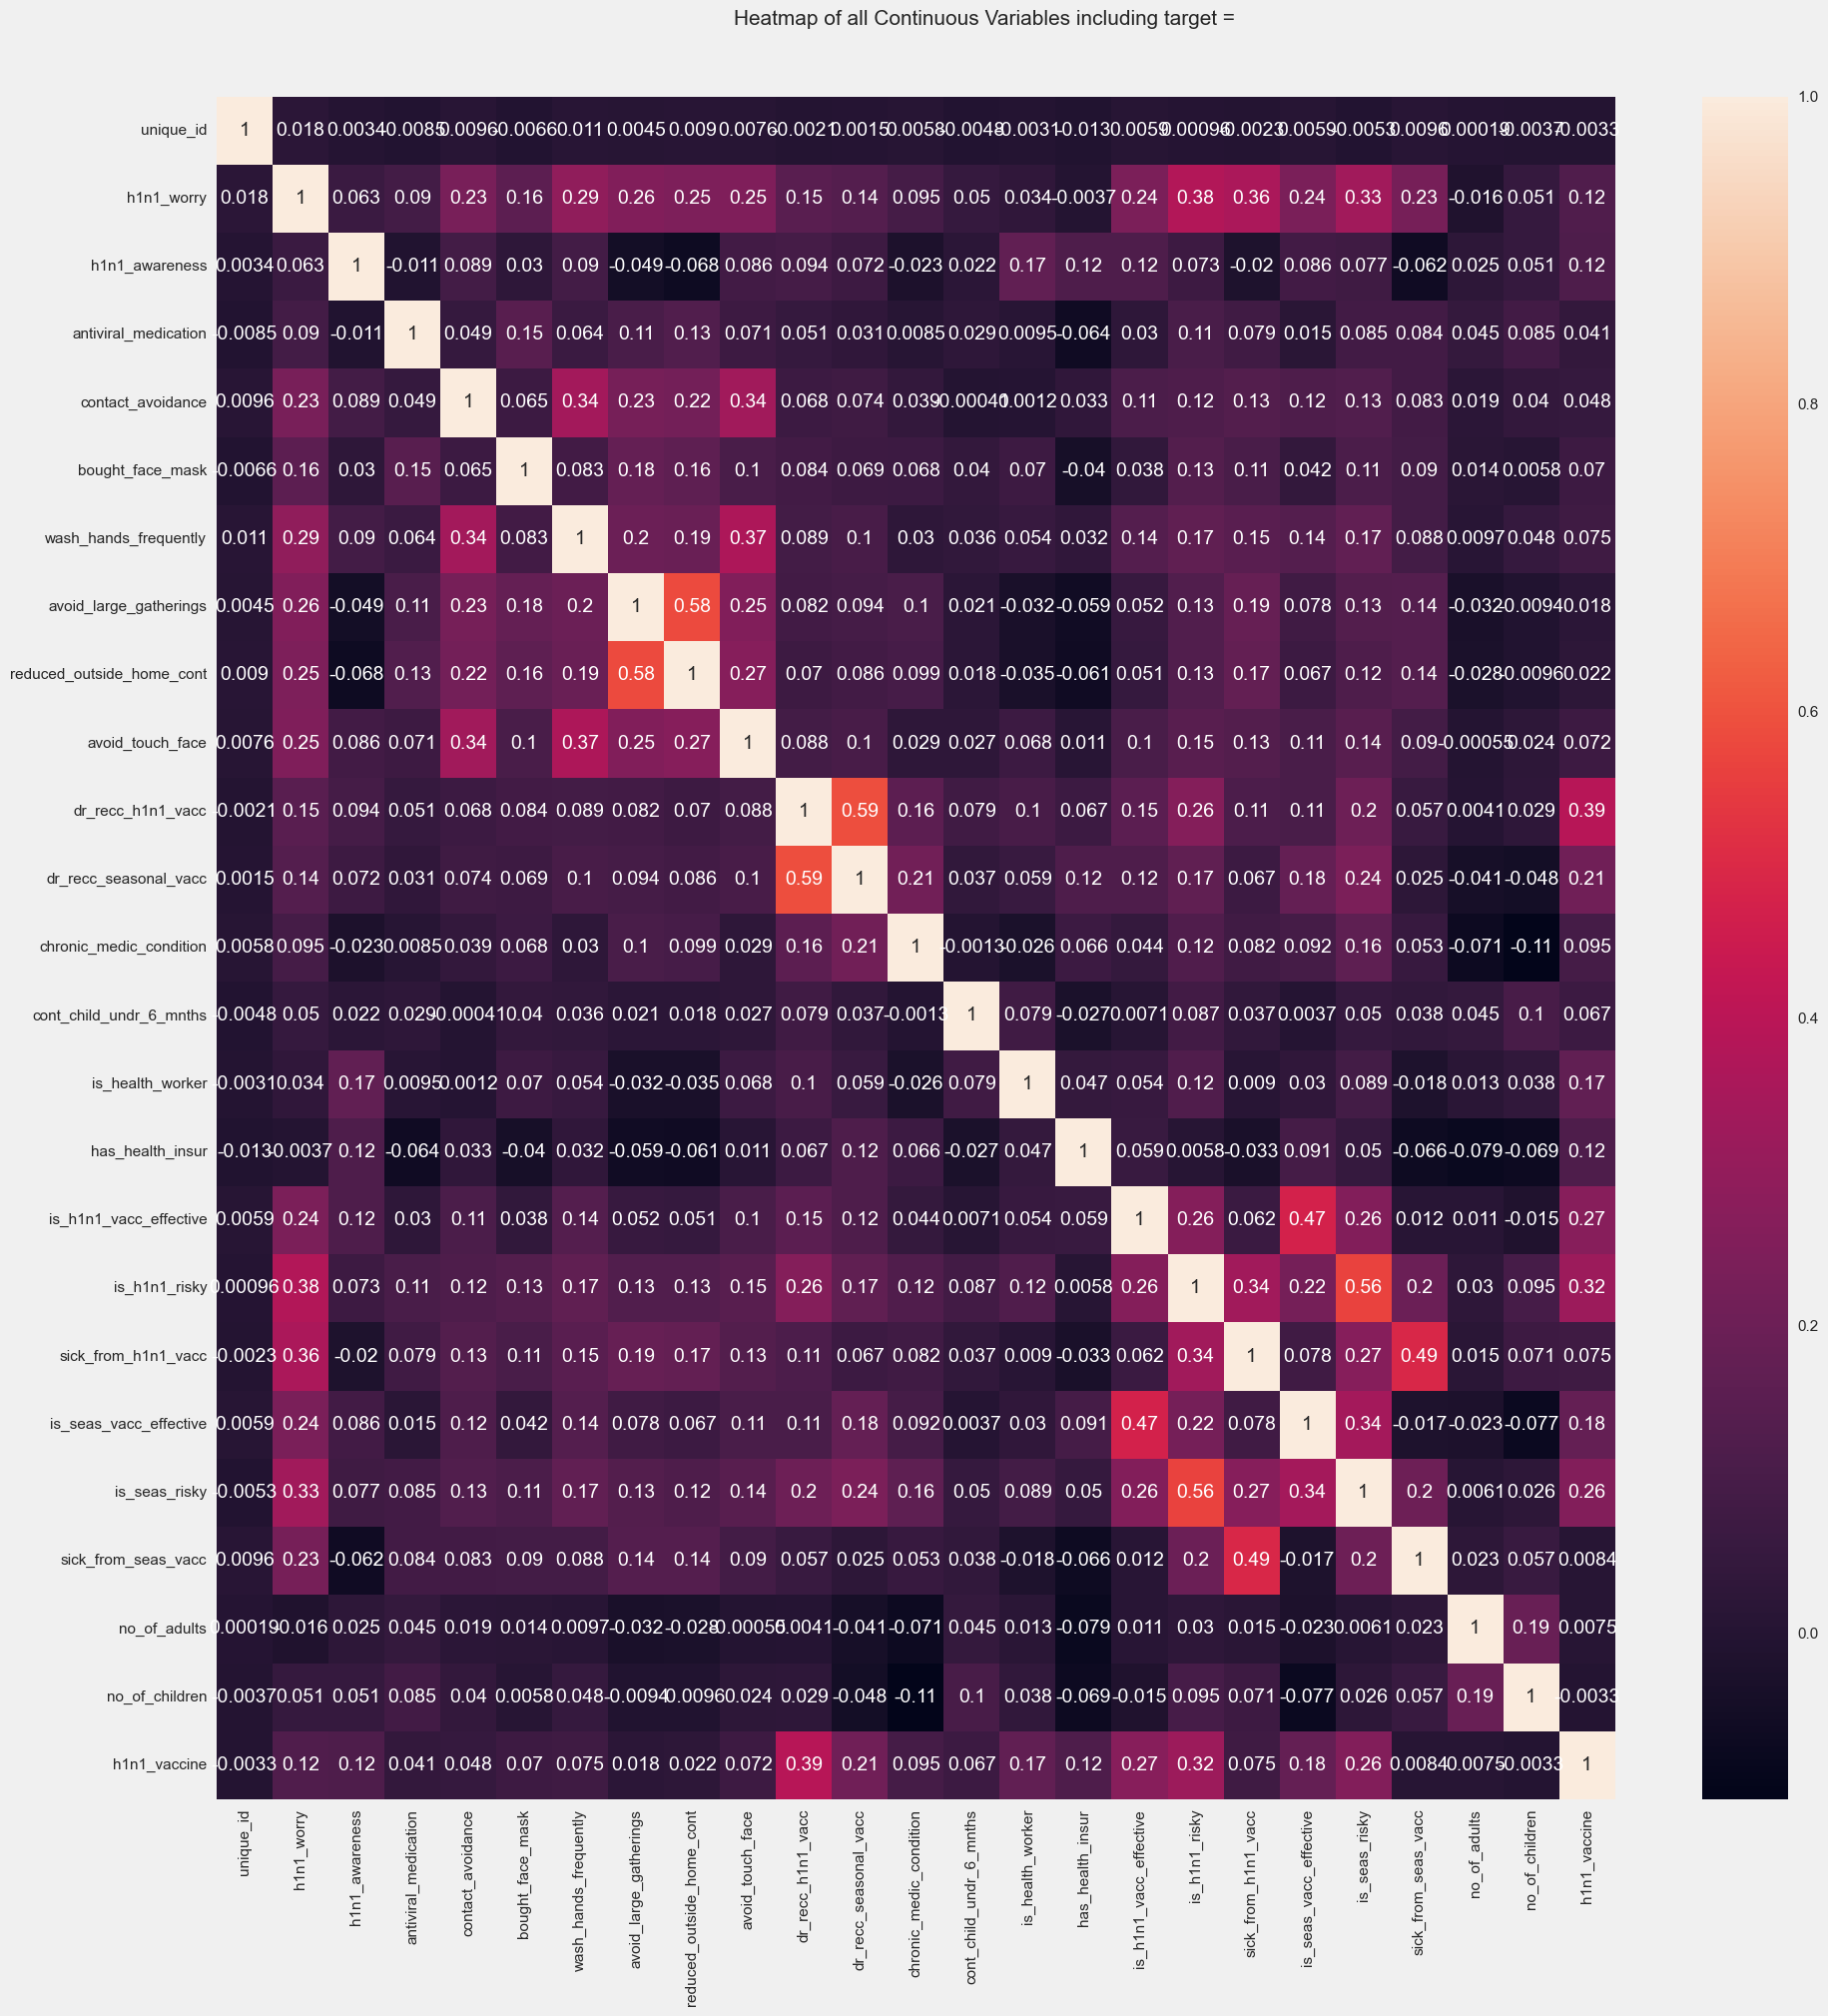

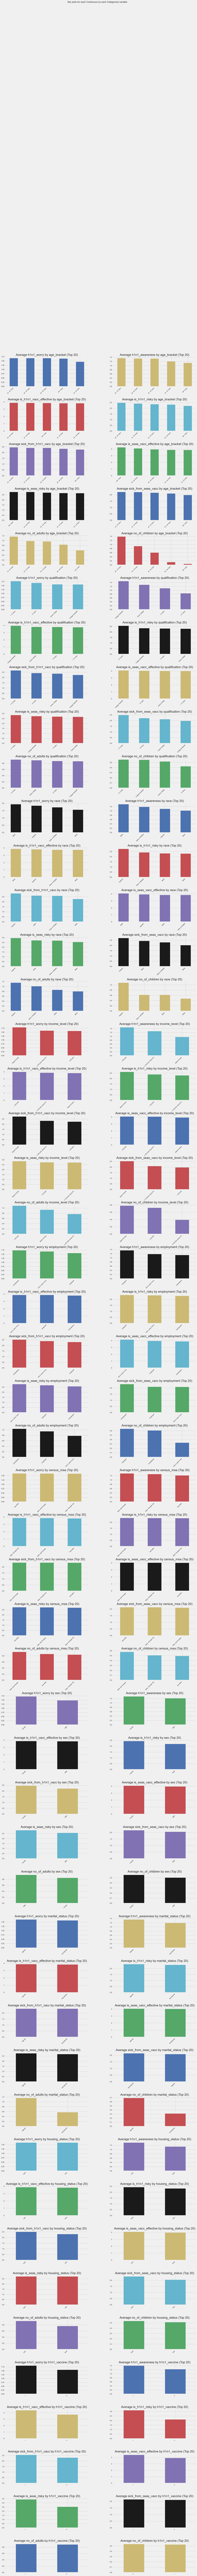

All Plots done
Time to run AutoViz = 61 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [21]:
filename = 'https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv'
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg"
)


In [23]:
train['h1n1_worry']=train['h1n1_worry'].replace({0 :'Not at all concerned',
                                             1 : 'Not very concerned',
                                             2 :'Somewhat concerned',
                                             3 :'Very concerned'})
train['h1n1_worry'].value_counts()

Somewhat concerned      10575
Not very concerned       8153
Very concerned           4591
Not at all concerned     3296
Name: h1n1_worry, dtype: int64

In [25]:
test=test.drop(['unique_id'],axis=1)
test.head()

h1n1_worry  h1n1_awareness  antiviral_medication  contact_avoidance  \
0         1.0             0.0                   0.0                0.0   
1         3.0             2.0                   0.0                1.0   
2         1.0             1.0                   0.0                1.0   
3         1.0             1.0                   0.0                1.0   
4         2.0             1.0                   0.0                1.0   

   bought_face_mask  wash_hands_frequently  avoid_large_gatherings  \
0               0.0                    0.0                     0.0   
1               0.0                    1.0                     0.0   
2               0.0                    0.0                     0.0   
3               0.0                    1.0                     1.0   
4               0.0                    1.0                     1.0   

   reduced_outside_home_cont  avoid_touch_face  dr_recc_h1n1_vacc  ...   race  \
0                        1.0               1.0                0.0  ...  White   
1                        1.0               1.0                0.0  ...  White   
2                        0.0               0.0                NaN  ...  White   
3                        0.0               0.0                0.0  ...  White   
4                        0.0               1.0                0.0  ...  White   

      sex               income_level  marital_status  housing_status  \
0  Female              Below Poverty     Not Married             Own   
1    Male              Below Poverty     Not Married            Rent   
2    Male  <= $75,000, Above Poverty     Not Married             Own   
3  Female              Below Poverty     Not Married            Rent   
4  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 33 columns]

In [26]:
round(test.isnull().sum()*100/len(test),2).sort_values(ascending=False)

has_health_insur             45.96
income_level                 16.56
dr_recc_h1n1_vacc             8.09
dr_recc_seasonal_vacc         8.09
housing_status                7.65
employment                    5.48
qualification                 5.27
marital_status                5.27
chronic_medic_condition       3.64
cont_child_undr_6_mnths       3.07
is_health_worker              3.01
sick_from_seas_vacc           2.01
is_seas_risky                 1.92
is_seas_vacc_effective        1.73
sick_from_h1n1_vacc           1.48
is_h1n1_vacc_effective        1.46
is_h1n1_risky                 1.45
no_of_adults                  0.93
no_of_children                0.93
contact_avoidance             0.78
avoid_touch_face              0.48
h1n1_awareness                0.43
h1n1_worry                    0.34
avoid_large_gatherings        0.33
reduced_outside_home_cont     0.31
antiviral_medication          0.27
wash_hands_frequently         0.16
bought_face_mask              0.07
race                

In [27]:
test.isnull().sum().sort_values(ascending=False)

has_health_insur             12274
income_level                  4423
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
housing_status                2042
employment                    1463
marital_status                1408
qualification                 1407
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
sick_from_seas_vacc            537
is_seas_risky                  514
is_seas_vacc_effective         462
sick_from_h1n1_vacc            395
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
no_of_adults                   249
no_of_children                 249
contact_avoidance              208
avoid_touch_face               128
h1n1_awareness                 116
h1n1_worry                      92
avoid_large_gatherings          87
reduced_outside_home_cont       82
antiviral_medication            71
wash_hands_frequently           42
bought_face_mask                19
race                

In [28]:
train=train.drop(['employment'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  object 
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [29]:
test['h1n1_awareness']=test['h1n1_awareness'].replace({'Not at all concerned':0,
                                             'Not very concerned':1,
                                             'Somewhat concerned':2,
                                             'Very concerned':3})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [30]:
train['no_of_children'].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64